# <font color='green'>  Linear Regression :</font>








- **Linear regression** is a statistical method used to model and analyze the relationship between a dependent variable (often denoted as 𝑦) and one or more independent variables (often denoted as x).








### <font color='red'>   Simple Linear Regression :</font>







- it's check the relationship between one dependent variable (Y) and one independent variables (X).

**Mathematical Equation**




Where as :-

- **Y** :- Dependent Variable
- **X** :- Independent Variable
- **β0** :- The Y - Intercept
- **β1** :- Slope
- **ei** :- Error Term

**Slope (β1):** It tells about the Unit-Change, Means how much the dependent variable (Y) changes when the independent variable (X) increases by one unit. A positive slope means Y increases as X increases, and a negative slope means Y decreases as X increases.

**Intercept (β1):** It is the point where tha line is best Fit across Y-axis.
- This is the value of the dependent variable (Y) when the independent variable (X) is zero. It represents the starting point of the line on the Y-axis.

**Predict:**  

- Estimate the value of the dependent variable (y) based on the values of the independent variable (x). 



- Once the model is trained and the coefficients are estimated, we can use the regression equation to make predictions.


Mathmatical equation to find the predicted values

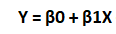

Where as :-

- **Y** :- Dependent Variable
- **β0** :- Intercept
- **β1** :- Slope
- **X** :- Independent Variable

**Residuals** 


- Residuals measure the difference between the observed values and   predicted values. 

**Mean Squared Error (MSE):**

- It tells us, on average, how far off our predictions are from the actual values
    
    

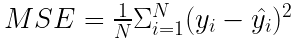

**Root Mean Squared Error (RMSE):**

- It is simply the square root of the MSE.

### <font color='red'>   Simple Linear Regression Model Buliding :</font>





-  Fit a linear model to the data to predict height based on age

In [15]:
# import  library


import numpy as np
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_excel("E:/Z.Sachin/ageandheight.xls")
data1.head()

,age,height,no_siblings
0,18,76.1,NaN
1,19,77.0,NaN
2,20,78.1,NaN
3,21,78.2,NaN
4,22,78.8,NaN


In [4]:
# drop the no_siblings column

data = data1.drop("no_siblings",axis=1)
data.head()

,age,height
0,18,76.1
1,19,77.0
2,20,78.1
3,21,78.2
4,22,78.8


In [5]:
# checking  NULL values in data

data.isna()

,age,height
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data.isna().sum()

age       0
height    0
dtype: int64

We dont have null values

In [7]:
data.shape

(12, 2)

In [8]:
data.describe()

,age,height
count,12.000000,12.000000
mean,23.500000,73.857500
std,3.605551,20.870262
min,18.000000,7.990000
25%,20.750000,77.825000
50%,23.500000,79.250000
75%,26.250000,81.350000
max,29.000000,83.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     12 non-null     int64  
 1   height  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


With help of **box plot**, we can check whether outliers are present in the data.

<AxesSubplot:>

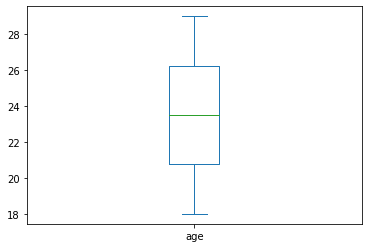

In [10]:
data["age"].plot(kind="box")

The box plot above shows no outliers in the age data

<AxesSubplot:>

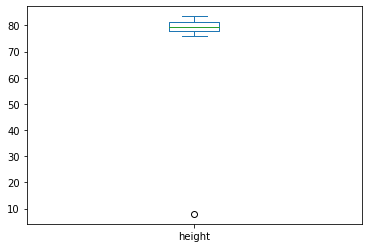

In [11]:
data["height"].plot(kind="box")

The box plot above shows outliers present in the age data. Use the **IQR** method to identify these outliers and replace them with **mean values**

In [12]:
# Calculate Q1, Q3, and IQR
q1 = data['height'].quantile(0.25)
q3 = data['height'].quantile(0.75)
iqr = q3 - q1

# Identify outliers (e.g., values outside 1.5*IQR range)
outliers = data[(data['height'] < q1 - 1.5 * iqr) | (data['height'] > q3 + 1.5 * iqr)]

# Calculate mean of non-outlier values
mean_non_outlier_values = data[~data1.index.isin(outliers.index)]['height'].mean()

# Replace outliers with mean of non-outlier values
data['height'] = data['height'].mask((data['height'] < q1 - 1.5 * iqr) | (data['height'] > q3 + 1.5 * iqr), mean_non_outlier_values)
print(data)

    age     height
0    18  76.100000
1    19  77.000000
2    20  78.100000
3    21  78.200000
4    22  78.800000
5    23  79.700000
6    24  79.845455
7    25  81.100000
8    26  81.200000
9    27  81.800000
10   28  82.800000
11   29  83.500000


<AxesSubplot:>

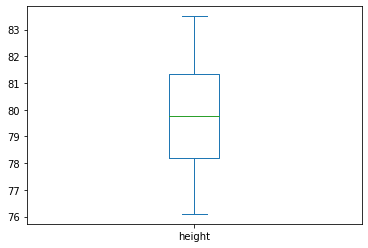

In [13]:
data["height"].plot(kind="box")

**Build a model** 

In [16]:
X = data[['age']]
y = data['height']
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predict height using the test set
y_pred = model.predict(X_test)
y_pred

array([82.70172676, 82.07684104, 76.45286948])

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.07027181857130561
R-squared: 0.9919310236394265
Root Mean Squared Error: 0.26508832220847756


An R-squared value of 0.991 indicates that your linear regression model explains **99.1%** of the variance in the dependent variable (height) based on the independent variable (age).

In [21]:
# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", r2_adj)

Adjusted R-squared: 0.9838620472788531


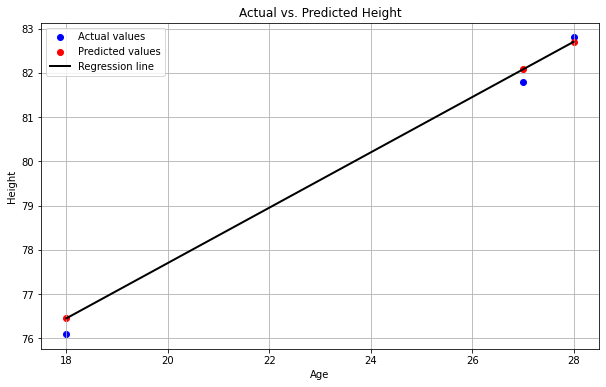

In [22]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Actual vs. Predicted Height')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()